In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period_Boyd.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit.jpg
2022_Feb_week4_new_ephemeris_sin_fit.out
2022_Feb_week4_new_ephemeris_sin_fit_BJD.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_BJD.jpg
2022_Feb_week4_new_ephemeris_sin_fit_BJD_Res.jpg
2022_Feb_week4_new_ephemeris_sin_fit_Boyd.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg
2022_Feb_week4_new_ephemeris_sin_fit_Res_Boyd.jpg
2022_Feb_week4_new_ephemeris_sin_fit_weighted_data.ipynb
interporate.out
interporate_weighted_mean.out


In [3]:
DP_Leo = open("2022_Feb_week4_Linear_fit_period.dat",'r').readlines()
N_dpleo = len(DP_Leo)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("2022_Feb_week4_Linear_fit_period.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [4]:
#New ephemeris
T0_bjd = 2448773.2148464173
T0_bjd_err = 2.9564294265740673e-09
P0_day = 0.062362845525219396
P0_day_err = 2.6193240365559364e-19

In [5]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo)]
Delta_aT = [i for i in range(N_dpleo)]
Delta_aT_err = [i for i in range(N_dpleo)]
E_af = [i for i in range(N_dpleo)] #float number
E_ak = [i for i in range(N_dpleo)] #integer number
E_aj = [i for i in range(N_dpleo)] #integer number
P_aE = [i for i in range(N_dpleo)]
P_err_aE = [i for i in range(N_dpleo)]
T_aC_linear = [i for i in range(N_dpleo)]
T_aO_linear = [i for i in range(N_dpleo)]
P_aver_a = [i for i in range(N_dpleo)]
P_aver_std_a = [i for i in range(N_dpleo)]

In [6]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("2022_Feb_week4_OC_diagram.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	2444214.553250	2444214.553201	4.201667	14.687745
1	2444214.615620	-73098	2444214.615620	2444214.615564	4.819809	14.687745
2	2444214.677980	-73097	2444214.677980	2444214.677927	4.573984	14.687745
3	2444968.023090	-61017	2444968.023090	2444968.021101	171.849158	100.223745
4	2444968.957120	-61002	2444968.957120	2444968.956544	49.793373	100.223745
5	2444969.019620	-61001	2444969.019620	2444969.018907	61.643520	100.223745
6	2444978.997550	-60841	2444978.997550	2444978.996962	50.818956	100.223745
7	2444993.900780	-60602	2444993.900780	2444993.901682	-77.924019	59.615745
8	2444993.963280	-60601	2444993.963280	2444993.964045	-66.073872	59.615745
9	2444994.026420	-60600	2444994.026420	2444994.026408	1.072294	59.615745
10	2445020.905130	-60169	2445020.905130	2445020.904794	29.029495	19.871745
11	2445021.902920	-60153	2445021.902920	2445021.902600	27.687840	19.871745
12	2445024.833860	-60106	2445024.833860

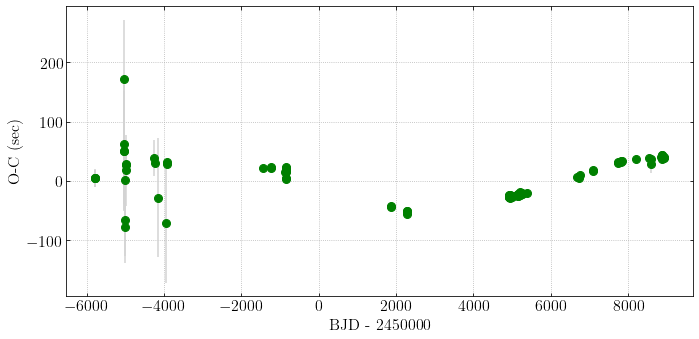

In [7]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_OC_diagram.out'
Data   = np.genfromtxt(Input)

N = 2450000
BJD_time = Data[:,0] - N
Cycle = Data[:,1]
T_O_linear = Data[:,2]
T_C_linear = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time)
x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [8]:
#Read data ---#1
Input = "2022_Feb_week4_OC_diagram.out"
Data   = np.genfromtxt(Input)

N_BMJD = 2400000
BJD_time = Data[:,0] - N_BMJD
Epoch = Data[:,1]
OC = Data[:,4]
OC_err = Data[:,5]

In [9]:
x = BJD_time
#x = Epoch
y = OC
dy = OC_err

len_x = len(x)
print(len_x)

114


In [10]:
def sin_fit(x, a, b, c, d):
    return a*np.sin(b*x - np.radians(c)) + d

In [11]:
guess = [41.9455, 0.0000324289, -145.235, -5.46613]
params, params_covariance = optimization.curve_fit(sin_fit, x, y, guess)

a = params[0]
b = params[1]
c = params[2]
d = params[3]


da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]
dd = params_covariance[3,3]

output_fit = sin_fit(x, a, b, c, d)


print("The fitting parameters")
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)
print("d =", d, "+/-", dd**0.5)

The fitting parameters
a = 41.63248737230567 +/- 4.109287931376244
b = 0.0005184725289280593 +/- 1.8787419635873943e-05
c = 1303.459888293659 +/- 55.06425666736016
d = -4.9607700893855355 +/- 3.423711088435378


In [12]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max, len_x)
#y_line = sin_fit(x_line, *params)
y_line = sin_fit(x_line, *params) #### For all interporation 
s = a*np.sin(b*x - np.radians(c)) + d #just only our data point
Res = y - s
print(y)
print(s)

len_y_line = len(y_line)
print(len_y_line)

np.savetxt('2022_Feb_week4_new_ephemeris_sin_fit.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 4
dof = len_x - m
Chi_sqr = ((y - s)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[  4.201667   4.819809   4.573984 171.849158  49.793373  61.64352
  50.818956 -77.924019 -66.073872   1.072294  29.029495  27.68784
  17.860736  38.129264  30.866218 -28.271744 -71.337372  32.363816
  27.797958  22.18958   21.045551  24.023889  14.942989  15.287183
   4.67332   17.387474  24.313527  18.883704   3.949848  21.84796
 -43.515797 -41.415466 -50.924648 -55.244641 -51.170513 -27.598885
 -26.116736 -24.234228 -26.039489 -25.034988 -24.634588 -25.744459
 -26.85433  -27.100155 -25.624926 -25.006784 -24.128777 -27.830628
 -26.566221 -26.812086 -26.193944 -22.983782 -25.807585 -26.05345
 -26.65751  -26.285233 -25.667091 -25.048949 -25.653009 -26.76288
 -27.008745 -27.317695 -25.835547 -26.453608 -24.521855 -26.137416
 -23.298968 -22.961734 -24.935572 -22.575375 -23.298888 -24.008359
 -24.254224 -24.486007 -23.003858 -22.371675 -22.666503 -22.912368
 -21.416178 -19.070023 -21.261603 -20.875244 -23.713088 -22.23098
 -21.93591  -21.668883 -21.050741 -22.006036 -19.462578   5.964482
 

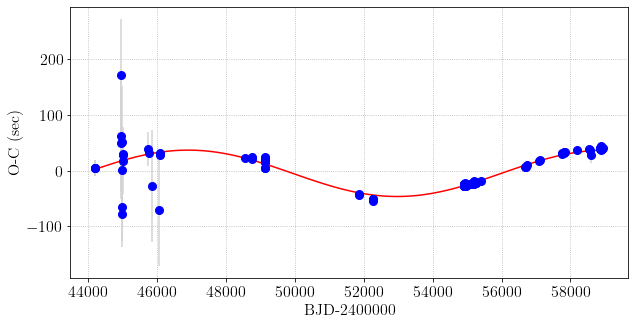

In [13]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

#### Interporate output

In [14]:
N = 700
x_range = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = sin_fit(x_range[i], a, b, c, d)
    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.2f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

30000 -37.88859784828966
30100 -36.52408606431649
30200 -35.07474674775819
30300 -33.544475049498146
30400 -31.9373836290697
30500 -30.25779160173761
30600 -28.510212930722382
30700 -26.69934429576383
30800 -24.830052470627464
30900 -22.907361243477112
31000 -20.936437915266055
31100 -18.92257941243186
31200 -16.871198051218688
31300 -14.787806991885153
31400 -12.678005421890315
31500 -10.547463507878543
31600 -8.401907156905311
31700 -6.247102627858622
31800 -4.088841034433485
31900 -1.9329227813081942
32000 0.21485802464922799
32100 2.348729146249009
32200 4.462955729072057
32300 6.551855714094881
32400 8.609815108424987
32500 10.63130307310617
32600 12.610886787444597
32700 14.54324604990738
32800 16.423187576353108
32900 18.245658957167542
33000 20.005762235793398
33100 21.698767072163257
33200 23.320123455655988
33300 24.865473933412012
33400 26.330665321142597
33500 27.711759864960136
33600 29.005045824231537
33700 30.207047447013032
33800 31.314534311256928
33900 32.324530006685

In [15]:
InputFile_out = "interporate.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range = Data_out[:,1]
y_range = Data_out[:,2]

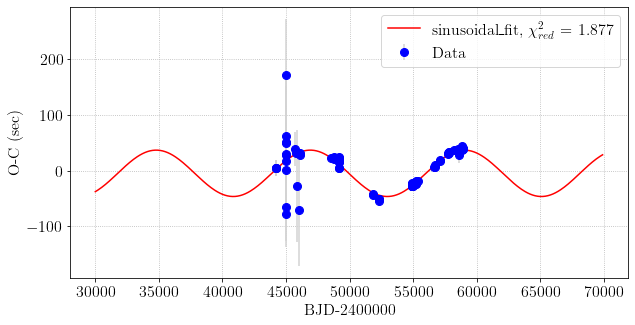

In [16]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_range, y_range, '-', color='red',label='sinusoidal\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_BJD.jpg", dpi=1000)
plt.show()

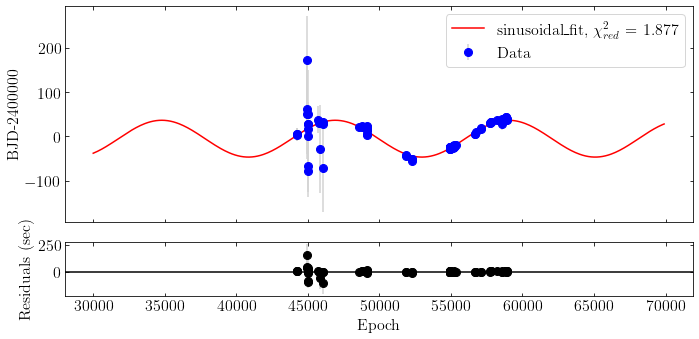

In [17]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
ax0.plot(x_range, y_range, '-', color='red',label='sinusoidal\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('BJD-'+str(N_BMJD))
ax1.set_ylabel('Residuals (sec)')
ax0.legend(loc="best")

Residual = y-s

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_BJD_Res.jpg", dpi=1000)

plt.show()